# <center>PUBG game prediction</center>

<center><img src='https://media.giphy.com/media/KwY3NuWKRM3aUrAaCK/giphy-downsized-large.gif'></center>

### Table Content
1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrang)


## Importing Libraries<a class= "anchor" id= "import">

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# handling warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# !pip install catboost
import catboost as cb

In [3]:
from sklearn.metrics import mean_squared_error,r2_score


## Reading Data <a class = "anchor" id="read">

In [4]:
df= pd.read_csv('PUBG_Game_Prediction_data.csv')

In [5]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
df.shape

(4446966, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## Data Wrangling

In [8]:
# check for null values
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
# removing the null value
df.drop(2744604,inplace=True)

In [10]:
# checking the entire df for null values
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Understanding players distribution in a game

In [11]:
# prepare new parameter to know how many players are in a gamge
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')

In [12]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


<Axes: ylabel='count'>

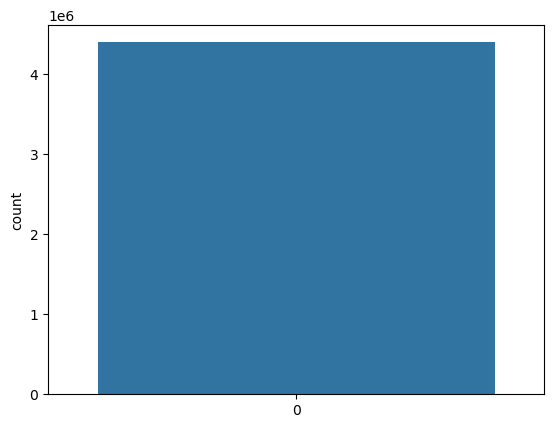

In [13]:
sns.countplot(df[df['playersJoined']>=75]['playersJoined'])

In [14]:
# Prepare a data parameter to gather the information of the toal distance travelled
df['totalDistance']=df['rideDistance'] + df['walkDistance'] + df['swimDistance']

In [15]:
# prepare a data parameter to check for anamoly detection that 
# the person has not moved but still managed to do the kills
df['killswithoutMoving']=(df['kills']>0) & (df['totalDistance']==0)

In [16]:
df.groupby('killswithoutMoving')['killswithoutMoving'].count()

killswithoutMoving
False    4445430
True        1535
Name: killswithoutMoving, dtype: int64

In [17]:
df[df['killswithoutMoving']==False]['killswithoutMoving'].count()

4445430

In [18]:
df[df['killswithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [19]:
df[df['killswithoutMoving']==True].shape

(1535, 32)

In [20]:
df[df['killswithoutMoving']].index

Int64Index([   1824,    6673,   11892,   14631,   15591,   20881,   23298,
              24640,   25659,   30079,
            ...
            4426500, 4429697, 4432954, 4436511, 4437516, 4440232, 4440898,
            4440927, 4441511, 4446682],
           dtype='int64', length=1535)

In [21]:
# drop the table
df.drop(df[df['killswithoutMoving']==True].index,inplace=True)

In [22]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,97,49.7500,False


### Extraordinary road kills

In [23]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving'],
      dtype='object')

In [24]:
df[df['roadKills']>5].shape

(46, 32)

In [25]:
df.drop(df[df['roadKills']>5].index,inplace=True)

### How many kill?

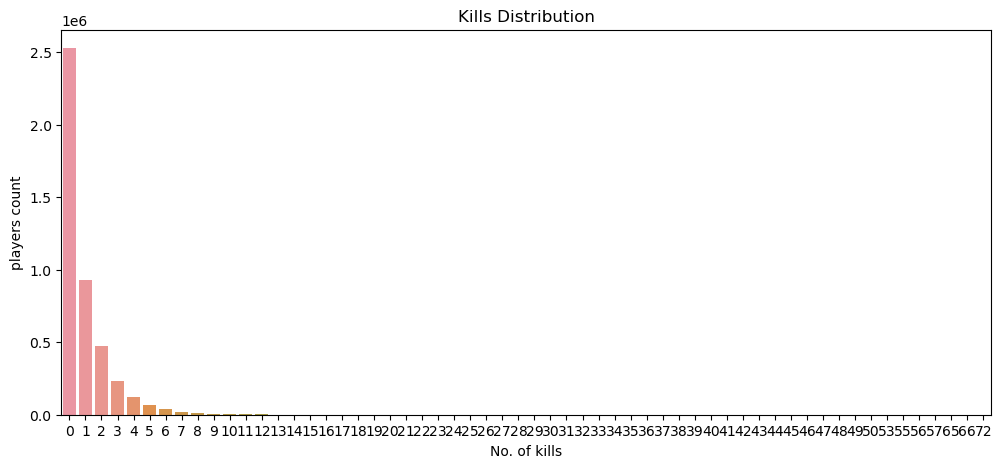

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x=df['kills'])
plt.title('Kills Distribution')
plt.xlabel('No. of kills')
plt.ylabel('players count')

plt.show()

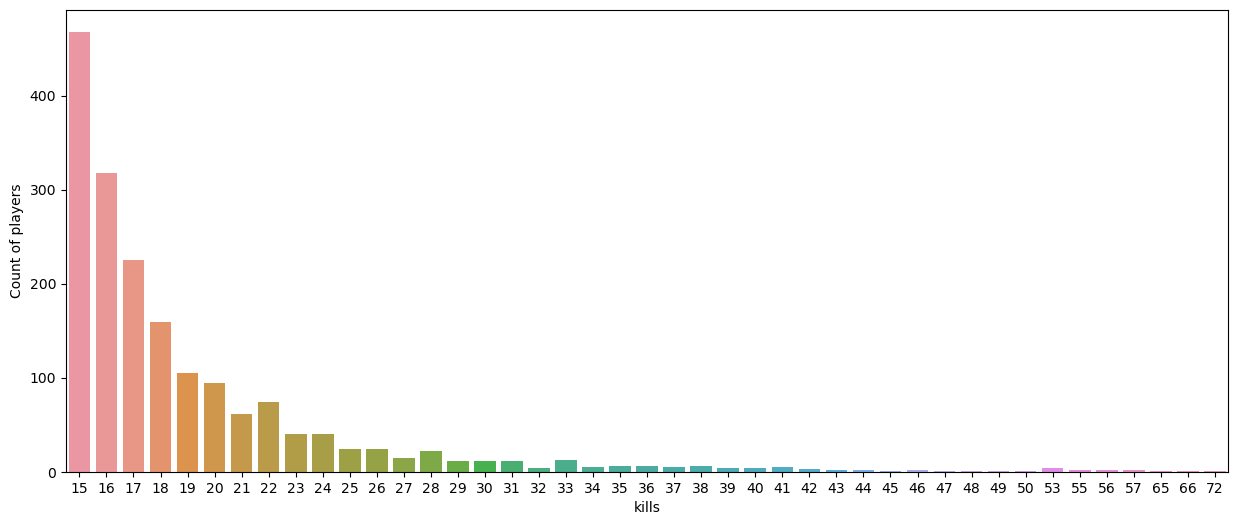

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x=df[df['kills']>=15]['kills'])
plt.ylabel('Count of players')
plt.show()


In [28]:
df[df['kills']>20].shape

(417, 32)

In [29]:
#dropping all the rows with kills greater than 20
df.drop(df[df['kills']>20].index,inplace=True)

### Head shot


In [30]:
#Head shot rate

df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate']=df['headshot_rate'].fillna(0)

In [31]:
df['headshot_rate']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshot_rate, Length: 4444967, dtype: float64

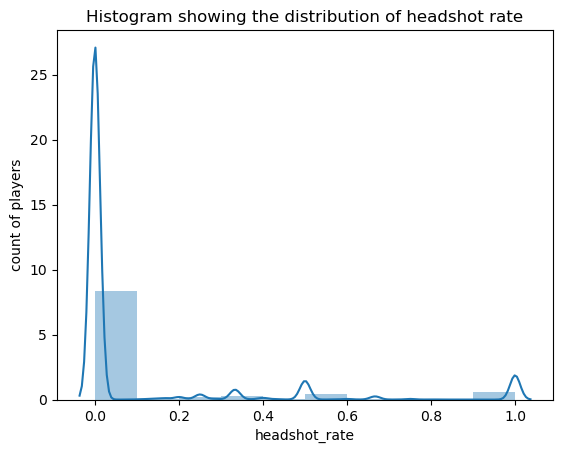

In [32]:
sns.distplot(df['headshot_rate'],bins=10).set_title('Histogram showing the distribution of headshot rate')
plt.ylabel('count of players')
plt.show()

In [33]:
df[(df['headshot_rate']==1) & (df['kills']>5)].shape

(187, 33)

In [34]:
# dropping all the rows having headsot_rate==1 (headshot==kills) and kills are greater than 5df
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index,inplace= True)

### Longest Shot

In [35]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate'],
      dtype='object')

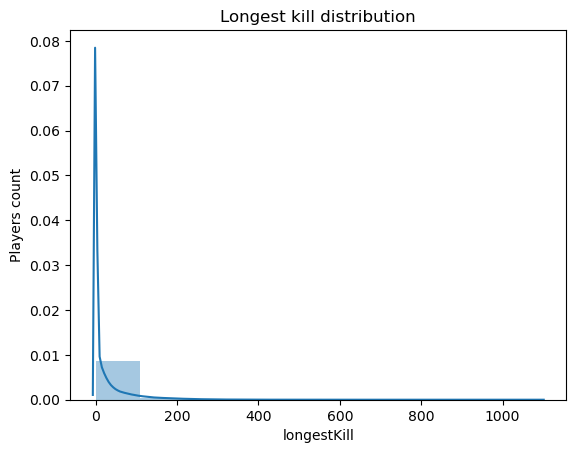

In [36]:
sns.distplot(df['longestKill'],bins=10).set_title('Longest kill distribution')
plt.ylabel('Players count')
plt.show()

In [37]:
df[df['longestKill']>500].shape

(1736, 33)

In [38]:
#dropping all the rows whose longestkills are more than 500meters
df.drop(df[df['longestKill']>500].index, inplace= True)

### Weapon change

In [39]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate'],
      dtype='object')

Text(0.5, 1.0, 'weapon acuired distribution')

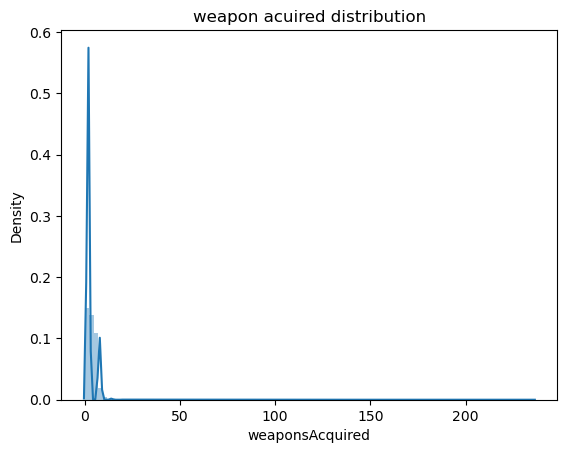

In [40]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title('weapon acuired distribution')


In [41]:
#dropping all the rows where weapons Acquired is more than 15 (sign of using some mod apk)
df.drop(df[df['weaponsAcquired']>=15].index,inplace=True)

### EDA

In [42]:
df.shape

(4436235, 33)

In [43]:
df.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

In [44]:
df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving,headshot_rate
assists,1.000000,0.318448,0.385475,0.294825,0.181340,0.228999,-0.290489,0.040284,0.293496,0.237078,...,0.003048,0.059659,0.300588,0.206149,0.023658,0.304744,-0.009126,0.241538,NaN,0.099247
boosts,0.318448,1.000000,0.540235,0.366320,0.345840,0.537563,-0.556004,0.008198,0.522639,0.407975,...,0.013510,0.087188,0.640332,0.439724,-0.007695,0.635045,-0.017679,0.574290,NaN,0.183977
damageDealt,0.385475,0.540235,1.000000,0.748249,0.601079,0.347206,-0.689905,0.051587,0.882590,0.708988,...,0.012154,0.083588,0.412737,0.321430,0.017134,0.450160,-0.013328,0.323694,NaN,0.303090
DBNOs,0.294825,0.366320,0.748249,1.000000,0.471709,0.268112,-0.563303,0.043354,0.723149,0.655122,...,0.070593,0.060892,0.290402,0.216448,0.010690,0.283570,0.006116,0.228841,NaN,0.249082
headshotKills,0.181340,0.345840,0.601079,0.471709,1.000000,0.202270,-0.478870,0.024747,0.665296,0.514892,...,0.006802,0.040078,0.259795,0.194983,0.004198,0.282870,-0.000886,0.194741,NaN,0.751369
heals,0.228999,0.537563,0.347206,0.268112,0.202270,1.000000,-0.386005,-0.002597,0.315779,0.270068,...,0.035022,0.063096,0.431893,0.320883,-0.011229,0.428740,-0.013847,0.440063,NaN,0.122056
killPlace,-0.290489,-0.556004,-0.689905,-0.563303,-0.478870,-0.386005,1.000000,-0.023412,-0.748073,-0.811715,...,-0.037280,-0.073531,-0.591473,-0.511687,-0.002272,-0.719654,0.114351,-0.484065,NaN,-0.386757
killPoints,0.040284,0.008198,0.051587,0.043354,0.024747,-0.002597,-0.023412,1.000000,0.037789,0.037324,...,-0.039761,-0.009700,0.004439,-0.003183,0.983457,0.012912,0.051547,-0.017856,NaN,0.014771
kills,0.293496,0.522639,0.882590,0.723149,0.665296,0.315779,-0.748073,0.037789,1.000000,0.813996,...,0.014351,0.082789,0.390947,0.299685,0.006078,0.430555,0.002495,0.293896,NaN,0.330531
killStreaks,0.237078,0.407975,0.708988,0.655122,0.514892,0.270068,-0.811715,0.037324,0.813996,1.000000,...,0.026474,0.064465,0.329867,0.274589,0.008200,0.377891,0.013493,0.246885,NaN,0.398252


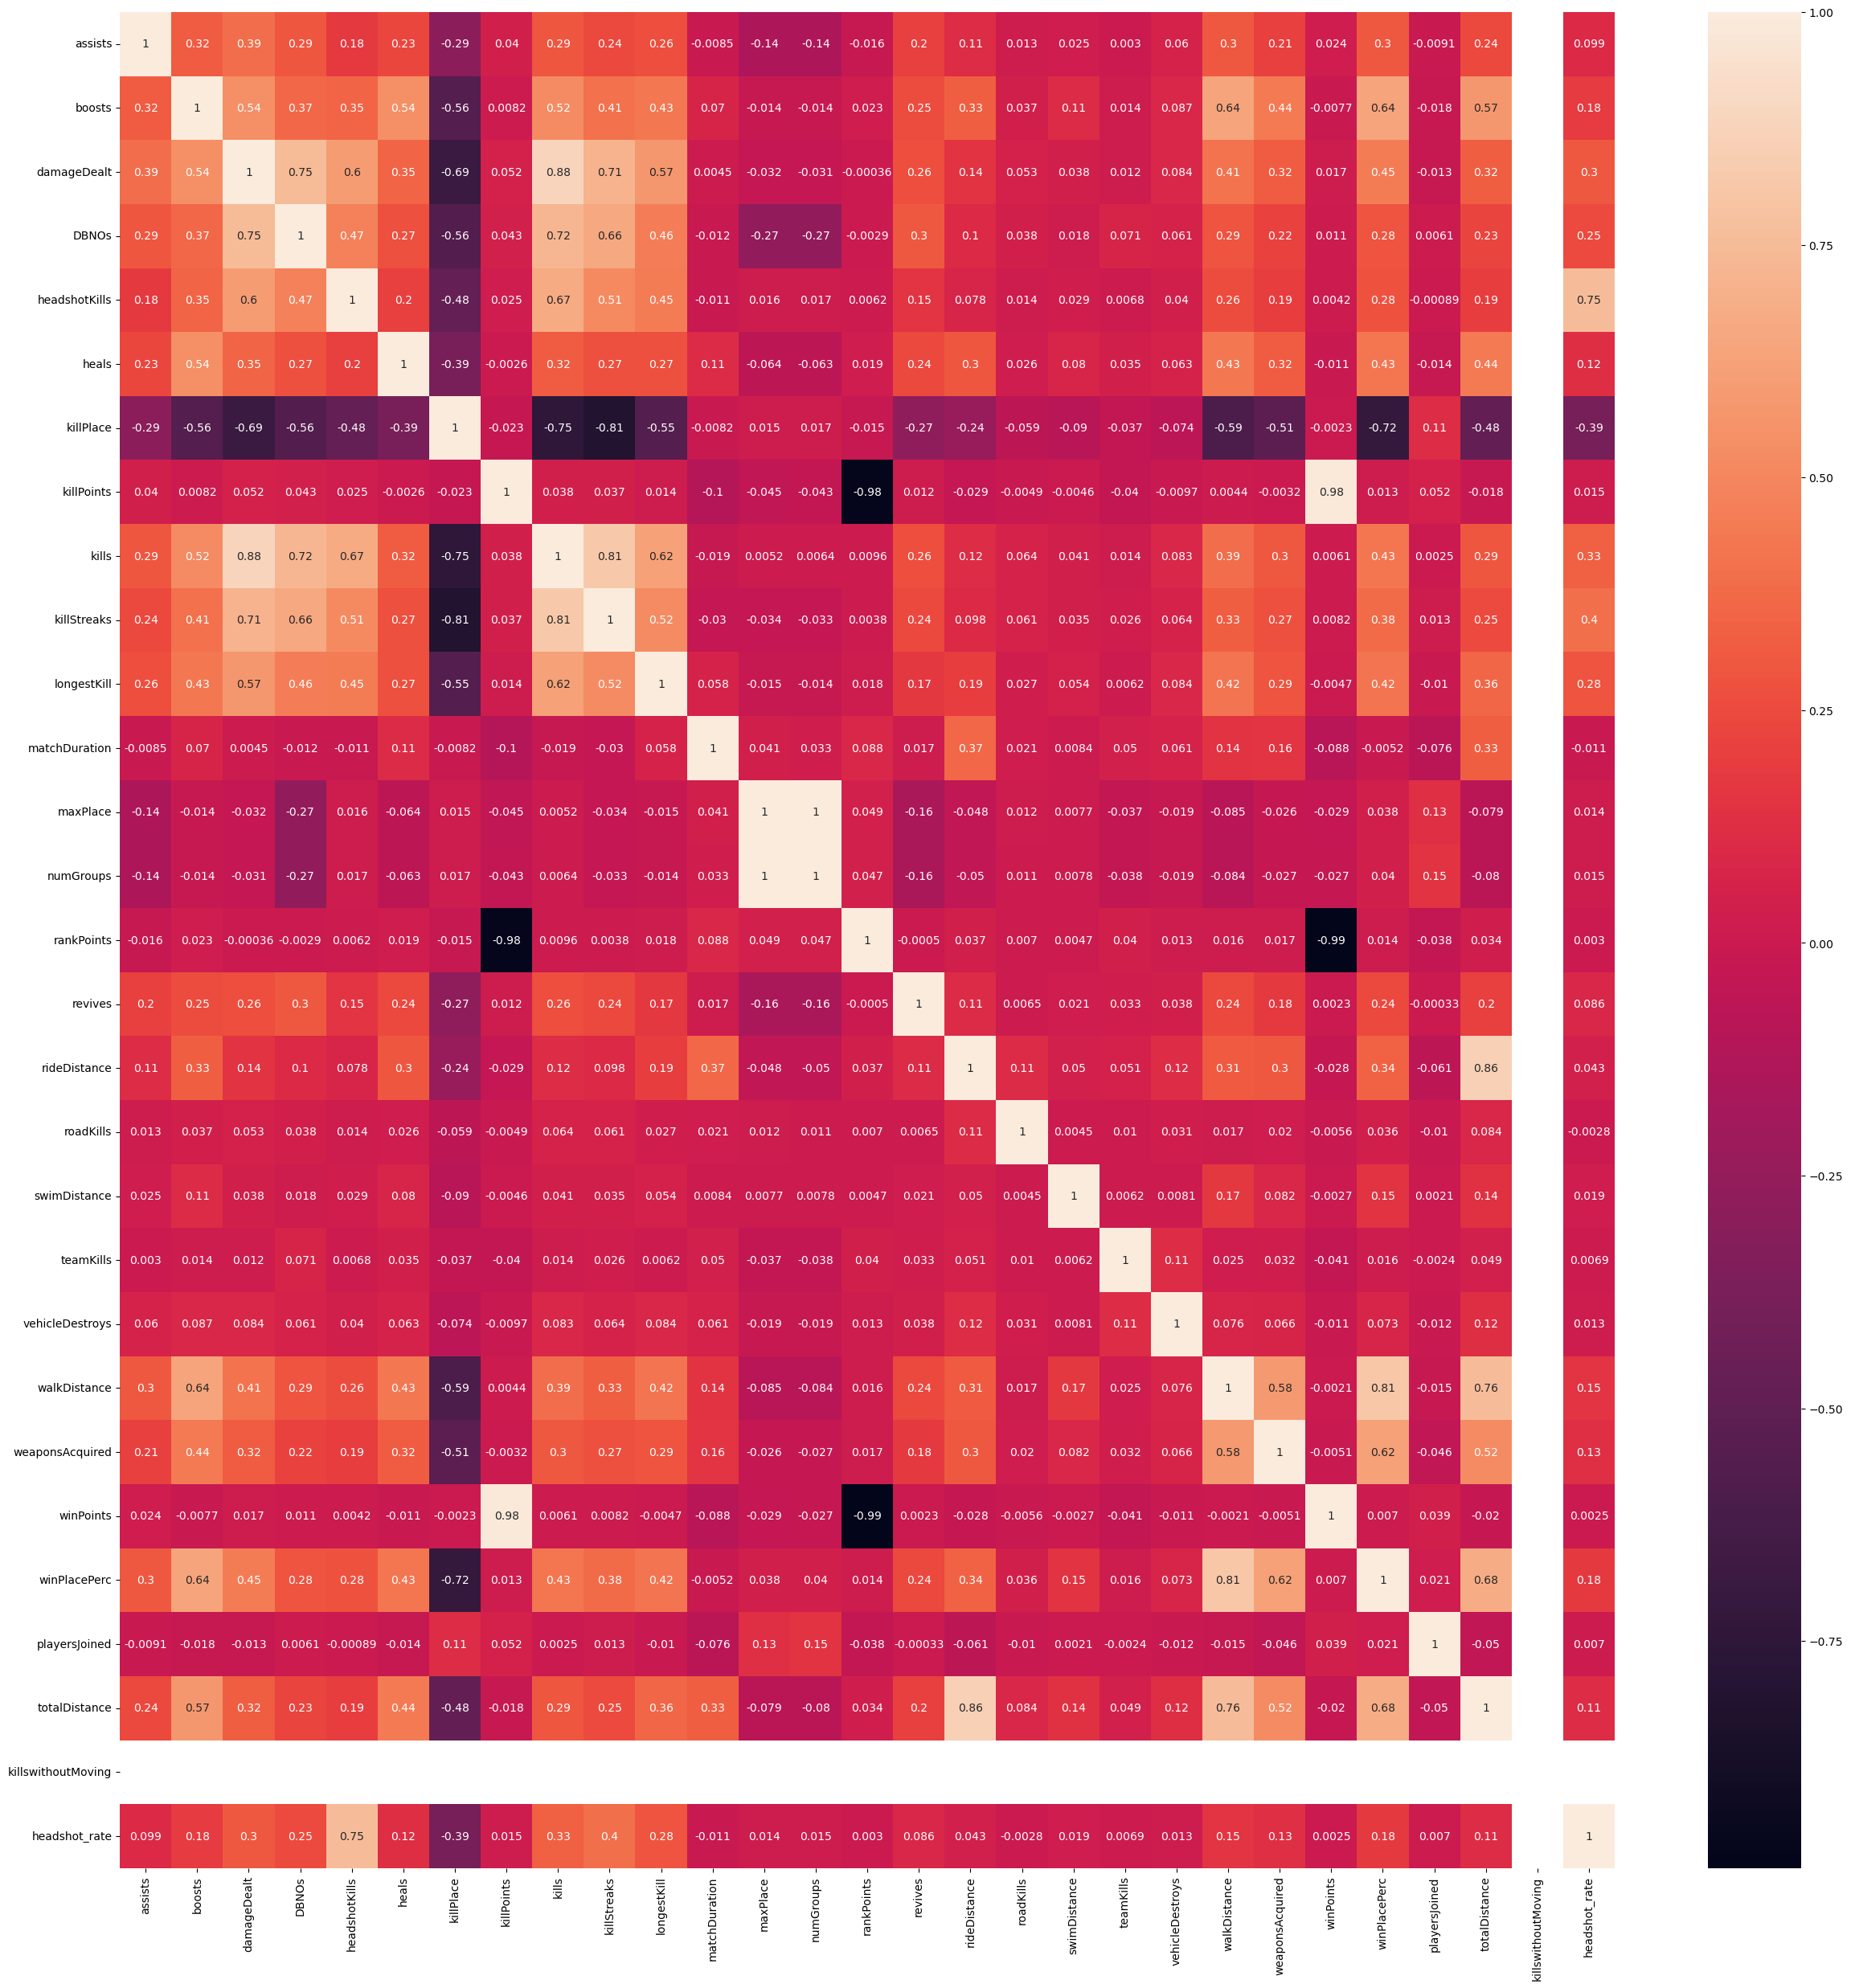

In [45]:
#correlation of parameter with win prediction
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Feature Engineering

In [46]:
normalizing_factor= (100-df['playersJoined']/100) +1

In [47]:
df['killsNorm']=df['kills']*normalizing_factor
df['damamageDealtNorm']=df['damageDealt']*normalizing_factor
df['maxPlaceNorm']=df['maxPlace']*normalizing_factor
df['matchDurationNorm']=df['matchDuration']*normalizing_factor

df['traveldistance']= df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] =df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [48]:
df=df.drop(columns=['groupId','matchId','Id','assists','walkDistance','swimDistance','rideDistance','heals','boosts',
                 'assists','revives','kills','damageDealt','maxPlace','matchDuration'])

In [49]:
df.shape

(4436235, 26)

### ML- Catboost Model

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4436235 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DBNOs               int64  
 1   headshotKills       int64  
 2   killPlace           int64  
 3   killPoints          int64  
 4   killStreaks         int64  
 5   longestKill         float64
 6   matchType           object 
 7   numGroups           int64  
 8   rankPoints          int64  
 9   roadKills           int64  
 10  teamKills           int64  
 11  vehicleDestroys     int64  
 12  weaponsAcquired     int64  
 13  winPoints           int64  
 14  winPlacePerc        float64
 15  playersJoined       int64  
 16  totalDistance       float64
 17  killswithoutMoving  bool   
 18  headshot_rate       float64
 19  killsNorm           float64
 20  damamageDealtNorm   float64
 21  maxPlaceNorm        float64
 22  matchDurationNorm   float64
 23  traveldistance      float64
 24  healsnboosts        int6

In [51]:
X= df.drop(columns=['winPlacePerc'])
y= df['winPlacePerc']

In [52]:
features= X.columns
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playersJoined', 'totalDistance', 'killswithoutMoving', 'headshot_rate',
       'killsNorm', 'damamageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

### handling Categorical data

In [53]:
# applying one-hot-encoding

In [54]:
# transformer= ColumnTransformer(transformers=
#     [ ("OneHot", OneHotEncoder(drop='first'), ['matchType']) ]
#     ,remainder='passthrough')



In [55]:
X=pd.get_dummies(X,columns=['matchType','killswithoutMoving'],sparse=True)

In [58]:
X.shape

(4436235, 40)

In [60]:
# Standardization (feature scaling)
scaler= StandardScaler()
scaler.fit(X)
X= pd.DataFrame(scaler.transform(X))

In [61]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582948,-0.384165,0.449325,1.172490,-0.765121,-0.459618,-0.732885,-1.212390,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
1,-0.582948,-0.384165,0.340033,-0.804728,-0.765121,-0.459618,-0.775859,0.803565,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
2,-0.582948,-0.384165,-0.024271,-0.804728,-0.765121,-0.459618,0.169559,0.813067,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,-0.808944,0.0
3,-0.582948,-0.384165,0.995782,-0.804728,-0.765121,-0.459618,-0.560991,0.700391,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
4,-0.582948,-0.384165,-0.097132,-0.804728,0.647736,0.727483,2.232288,0.906738,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,2.696903,-0.405065,-0.808944,0.0


In [66]:
# splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

### CatBoost Model

In [67]:
import catboost as cb

In [68]:
train_dataset= cb.Pool(X_train,y_train)
test_dataset= cb.Pool(X_test,y_test)

In [69]:
model= cb.CatBoostRegressor(loss_function='RMSE')

In [72]:
# grid search CV

grid={'iterations':[100,150],
     'learning_rate':[0.03,0.1],
     'depth':[2,4,6,8]}

model.grid_search(grid,train_dataset)

0:	learn: 0.5481978	test: 0.5482418	best: 0.5482418 (0)	total: 548ms	remaining: 54.2s
1:	learn: 0.5333612	test: 0.5334076	best: 0.5334076 (1)	total: 734ms	remaining: 36s
2:	learn: 0.5189836	test: 0.5190332	best: 0.5190332 (2)	total: 879ms	remaining: 28.4s
3:	learn: 0.5050583	test: 0.5051093	best: 0.5051093 (3)	total: 1.03s	remaining: 24.7s
4:	learn: 0.4915911	test: 0.4916428	best: 0.4916428 (4)	total: 1.16s	remaining: 22.1s
5:	learn: 0.4785596	test: 0.4786087	best: 0.4786087 (5)	total: 1.3s	remaining: 20.4s
6:	learn: 0.4659781	test: 0.4660310	best: 0.4660310 (6)	total: 1.43s	remaining: 19s
7:	learn: 0.4537725	test: 0.4538275	best: 0.4538275 (7)	total: 1.57s	remaining: 18s
8:	learn: 0.4419738	test: 0.4420278	best: 0.4420278 (8)	total: 1.7s	remaining: 17.2s
9:	learn: 0.4305932	test: 0.4306467	best: 0.4306467 (9)	total: 1.85s	remaining: 16.7s
10:	learn: 0.4195916	test: 0.4196472	best: 0.4196472 (10)	total: 2.02s	remaining: 16.3s
11:	learn: 0.4088809	test: 0.4089371	best: 0.4089371 (11)	to

94:	learn: 0.1399028	test: 0.1398464	best: 0.1398464 (94)	total: 14s	remaining: 734ms
95:	learn: 0.1394716	test: 0.1394156	best: 0.1394156 (95)	total: 14.1s	remaining: 586ms
96:	learn: 0.1391040	test: 0.1390486	best: 0.1390486 (96)	total: 14.2s	remaining: 438ms
97:	learn: 0.1387504	test: 0.1386944	best: 0.1386944 (97)	total: 14.3s	remaining: 291ms
98:	learn: 0.1384083	test: 0.1383503	best: 0.1383503 (98)	total: 14.4s	remaining: 145ms
99:	learn: 0.1380733	test: 0.1380158	best: 0.1380158 (99)	total: 14.5s	remaining: 0us

bestTest = 0.1380158144
bestIteration = 99

0:	loss: 0.1380158	best: 0.1380158 (0)	total: 31.8s	remaining: 7m 57s
0:	learn: 0.5125997	test: 0.5126468	best: 0.5126468 (0)	total: 146ms	remaining: 14.5s
1:	learn: 0.4672415	test: 0.4672892	best: 0.4672892 (1)	total: 254ms	remaining: 12.5s
2:	learn: 0.4265142	test: 0.4265703	best: 0.4265703 (2)	total: 373ms	remaining: 12.1s
3:	learn: 0.3902096	test: 0.3902687	best: 0.3902687 (3)	total: 494ms	remaining: 11.8s
4:	learn: 0.35819

88:	learn: 0.1173423	test: 0.1172827	best: 0.1172827 (88)	total: 11.5s	remaining: 1.42s
89:	learn: 0.1172392	test: 0.1171834	best: 0.1171834 (89)	total: 11.6s	remaining: 1.29s
90:	learn: 0.1169135	test: 0.1168590	best: 0.1168590 (90)	total: 11.7s	remaining: 1.16s
91:	learn: 0.1166518	test: 0.1165960	best: 0.1165960 (91)	total: 11.8s	remaining: 1.03s
92:	learn: 0.1165531	test: 0.1164980	best: 0.1164980 (92)	total: 11.9s	remaining: 899ms
93:	learn: 0.1164598	test: 0.1164036	best: 0.1164036 (93)	total: 12.1s	remaining: 770ms
94:	learn: 0.1163630	test: 0.1163065	best: 0.1163065 (94)	total: 12.2s	remaining: 641ms
95:	learn: 0.1162186	test: 0.1161661	best: 0.1161661 (95)	total: 12.3s	remaining: 512ms
96:	learn: 0.1161250	test: 0.1160735	best: 0.1160735 (96)	total: 12.4s	remaining: 383ms
97:	learn: 0.1160208	test: 0.1159691	best: 0.1159691 (97)	total: 12.5s	remaining: 255ms
98:	learn: 0.1159413	test: 0.1158892	best: 0.1158892 (98)	total: 12.6s	remaining: 127ms
99:	learn: 0.1158687	test: 0.115

81:	learn: 0.1466582	test: 0.1466162	best: 0.1466162 (81)	total: 9.03s	remaining: 7.49s
82:	learn: 0.1459795	test: 0.1459366	best: 0.1459366 (82)	total: 9.14s	remaining: 7.38s
83:	learn: 0.1453647	test: 0.1453194	best: 0.1453194 (83)	total: 9.25s	remaining: 7.27s
84:	learn: 0.1447906	test: 0.1447423	best: 0.1447423 (84)	total: 9.36s	remaining: 7.16s
85:	learn: 0.1441775	test: 0.1441280	best: 0.1441280 (85)	total: 9.47s	remaining: 7.05s
86:	learn: 0.1436462	test: 0.1435940	best: 0.1435940 (86)	total: 9.58s	remaining: 6.93s
87:	learn: 0.1431301	test: 0.1430769	best: 0.1430769 (87)	total: 9.69s	remaining: 6.82s
88:	learn: 0.1425724	test: 0.1425195	best: 0.1425195 (88)	total: 9.79s	remaining: 6.71s
89:	learn: 0.1421029	test: 0.1420498	best: 0.1420498 (89)	total: 9.9s	remaining: 6.6s
90:	learn: 0.1416479	test: 0.1415934	best: 0.1415934 (90)	total: 10s	remaining: 6.49s
91:	learn: 0.1411964	test: 0.1411403	best: 0.1411403 (91)	total: 10.1s	remaining: 6.38s
92:	learn: 0.1407669	test: 0.1407108

24:	learn: 0.1440643	test: 0.1440312	best: 0.1440312 (24)	total: 2.84s	remaining: 14.2s
25:	learn: 0.1423394	test: 0.1423023	best: 0.1423023 (25)	total: 2.94s	remaining: 14s
26:	learn: 0.1408466	test: 0.1408017	best: 0.1408017 (26)	total: 3.06s	remaining: 13.9s
27:	learn: 0.1395454	test: 0.1394976	best: 0.1394976 (27)	total: 3.16s	remaining: 13.8s
28:	learn: 0.1383276	test: 0.1382767	best: 0.1382767 (28)	total: 3.28s	remaining: 13.7s
29:	learn: 0.1370279	test: 0.1369803	best: 0.1369803 (29)	total: 3.39s	remaining: 13.6s
30:	learn: 0.1361142	test: 0.1360662	best: 0.1360662 (30)	total: 3.49s	remaining: 13.4s
31:	learn: 0.1350741	test: 0.1350272	best: 0.1350272 (31)	total: 3.6s	remaining: 13.3s
32:	learn: 0.1342587	test: 0.1342098	best: 0.1342098 (32)	total: 3.71s	remaining: 13.2s
33:	learn: 0.1335569	test: 0.1335041	best: 0.1335041 (33)	total: 3.81s	remaining: 13s
34:	learn: 0.1328430	test: 0.1327923	best: 0.1327923 (34)	total: 3.91s	remaining: 12.9s
35:	learn: 0.1322215	test: 0.1321700	

118:	learn: 0.1133271	test: 0.1132843	best: 0.1132843 (118)	total: 12.9s	remaining: 3.35s
119:	learn: 0.1132166	test: 0.1131755	best: 0.1131755 (119)	total: 13s	remaining: 3.24s
120:	learn: 0.1131479	test: 0.1131082	best: 0.1131082 (120)	total: 13.1s	remaining: 3.13s
121:	learn: 0.1129067	test: 0.1128687	best: 0.1128687 (121)	total: 13.2s	remaining: 3.03s
122:	learn: 0.1127964	test: 0.1127591	best: 0.1127591 (122)	total: 13.3s	remaining: 2.92s
123:	learn: 0.1125383	test: 0.1124997	best: 0.1124997 (123)	total: 13.4s	remaining: 2.81s
124:	learn: 0.1122126	test: 0.1121700	best: 0.1121700 (124)	total: 13.5s	remaining: 2.7s
125:	learn: 0.1121449	test: 0.1121050	best: 0.1121050 (125)	total: 13.6s	remaining: 2.59s
126:	learn: 0.1120809	test: 0.1120428	best: 0.1120428 (126)	total: 13.7s	remaining: 2.48s
127:	learn: 0.1119932	test: 0.1119549	best: 0.1119549 (127)	total: 13.8s	remaining: 2.38s
128:	learn: 0.1119418	test: 0.1119031	best: 0.1119031 (128)	total: 13.9s	remaining: 2.27s
129:	learn: 0

60:	learn: 0.1528589	test: 0.1528916	best: 0.1528916 (60)	total: 9.56s	remaining: 6.12s
61:	learn: 0.1511832	test: 0.1512143	best: 0.1512143 (61)	total: 9.71s	remaining: 5.95s
62:	learn: 0.1495757	test: 0.1496036	best: 0.1496036 (62)	total: 9.86s	remaining: 5.79s
63:	learn: 0.1479755	test: 0.1480032	best: 0.1480032 (63)	total: 10s	remaining: 5.62s
64:	learn: 0.1464727	test: 0.1465000	best: 0.1465000 (64)	total: 10.1s	remaining: 5.46s
65:	learn: 0.1450721	test: 0.1450950	best: 0.1450950 (65)	total: 10.3s	remaining: 5.3s
66:	learn: 0.1436203	test: 0.1436446	best: 0.1436446 (66)	total: 10.4s	remaining: 5.15s
67:	learn: 0.1423169	test: 0.1423421	best: 0.1423421 (67)	total: 10.6s	remaining: 4.99s
68:	learn: 0.1410661	test: 0.1410903	best: 0.1410903 (68)	total: 10.7s	remaining: 4.83s
69:	learn: 0.1398817	test: 0.1399041	best: 0.1399041 (69)	total: 10.9s	remaining: 4.67s
70:	learn: 0.1387397	test: 0.1387595	best: 0.1387595 (70)	total: 11.1s	remaining: 4.51s
71:	learn: 0.1376258	test: 0.137647

54:	learn: 0.1058644	test: 0.1058566	best: 0.1058566 (54)	total: 8.14s	remaining: 6.66s
55:	learn: 0.1054125	test: 0.1054059	best: 0.1054059 (55)	total: 8.3s	remaining: 6.52s
56:	learn: 0.1050254	test: 0.1050208	best: 0.1050208 (56)	total: 8.45s	remaining: 6.37s
57:	learn: 0.1048799	test: 0.1048756	best: 0.1048756 (57)	total: 8.58s	remaining: 6.21s
58:	learn: 0.1046259	test: 0.1046234	best: 0.1046234 (58)	total: 8.73s	remaining: 6.07s
59:	learn: 0.1042303	test: 0.1042303	best: 0.1042303 (59)	total: 8.87s	remaining: 5.92s
60:	learn: 0.1040693	test: 0.1040670	best: 0.1040670 (60)	total: 9.02s	remaining: 5.77s
61:	learn: 0.1039089	test: 0.1039084	best: 0.1039084 (61)	total: 9.15s	remaining: 5.61s
62:	learn: 0.1037225	test: 0.1037166	best: 0.1037166 (62)	total: 9.28s	remaining: 5.45s
63:	learn: 0.1033914	test: 0.1033914	best: 0.1033914 (63)	total: 9.42s	remaining: 5.3s
64:	learn: 0.1028985	test: 0.1028945	best: 0.1028945 (64)	total: 9.58s	remaining: 5.16s
65:	learn: 0.1024902	test: 0.10248

48:	learn: 0.1801125	test: 0.1801500	best: 0.1801500 (48)	total: 8.02s	remaining: 16.5s
49:	learn: 0.1773143	test: 0.1773493	best: 0.1773493 (49)	total: 8.18s	remaining: 16.4s
50:	learn: 0.1746247	test: 0.1746589	best: 0.1746589 (50)	total: 8.33s	remaining: 16.2s
51:	learn: 0.1720365	test: 0.1720697	best: 0.1720697 (51)	total: 8.47s	remaining: 16s
52:	learn: 0.1695804	test: 0.1696105	best: 0.1696105 (52)	total: 8.62s	remaining: 15.8s
53:	learn: 0.1672173	test: 0.1672469	best: 0.1672469 (53)	total: 8.77s	remaining: 15.6s
54:	learn: 0.1648903	test: 0.1649226	best: 0.1649226 (54)	total: 8.93s	remaining: 15.4s
55:	learn: 0.1626259	test: 0.1626599	best: 0.1626599 (55)	total: 9.08s	remaining: 15.2s
56:	learn: 0.1605330	test: 0.1605660	best: 0.1605660 (56)	total: 9.22s	remaining: 15s
57:	learn: 0.1585291	test: 0.1585594	best: 0.1585594 (57)	total: 9.37s	remaining: 14.9s
58:	learn: 0.1565441	test: 0.1565765	best: 0.1565765 (58)	total: 9.52s	remaining: 14.7s
59:	learn: 0.1546233	test: 0.1546575

142:	learn: 0.1100502	test: 0.1100733	best: 0.1100733 (142)	total: 22s	remaining: 1.08s
143:	learn: 0.1099456	test: 0.1099686	best: 0.1099686 (143)	total: 22.2s	remaining: 923ms
144:	learn: 0.1098507	test: 0.1098738	best: 0.1098738 (144)	total: 22.3s	remaining: 769ms
145:	learn: 0.1096526	test: 0.1096764	best: 0.1096764 (145)	total: 22.5s	remaining: 616ms
146:	learn: 0.1095580	test: 0.1095814	best: 0.1095814 (146)	total: 22.6s	remaining: 461ms
147:	learn: 0.1094336	test: 0.1094555	best: 0.1094555 (147)	total: 22.8s	remaining: 308ms
148:	learn: 0.1092013	test: 0.1092252	best: 0.1092252 (148)	total: 22.9s	remaining: 154ms
149:	learn: 0.1091012	test: 0.1091257	best: 0.1091257 (149)	total: 23.1s	remaining: 0us

bestTest = 0.1091257386
bestIteration = 149

6:	loss: 0.1091257	best: 0.0959351 (5)	total: 2m 27s	remaining: 3m 9s
0:	learn: 0.5114104	test: 0.5114564	best: 0.5114564 (0)	total: 179ms	remaining: 26.7s
1:	learn: 0.4649211	test: 0.4649782	best: 0.4649782 (1)	total: 332ms	remaining: 24

86:	learn: 0.0978087	test: 0.0978204	best: 0.0978204 (86)	total: 13.5s	remaining: 9.77s
87:	learn: 0.0974896	test: 0.0975064	best: 0.0975064 (87)	total: 13.7s	remaining: 9.62s
88:	learn: 0.0974076	test: 0.0974245	best: 0.0974245 (88)	total: 13.8s	remaining: 9.44s
89:	learn: 0.0973049	test: 0.0973231	best: 0.0973231 (89)	total: 13.9s	remaining: 9.27s
90:	learn: 0.0972302	test: 0.0972478	best: 0.0972478 (90)	total: 14s	remaining: 9.1s
91:	learn: 0.0971446	test: 0.0971607	best: 0.0971607 (91)	total: 14.2s	remaining: 8.93s
92:	learn: 0.0969992	test: 0.0970162	best: 0.0970162 (92)	total: 14.3s	remaining: 8.76s
93:	learn: 0.0968610	test: 0.0968773	best: 0.0968773 (93)	total: 14.4s	remaining: 8.59s
94:	learn: 0.0967915	test: 0.0968084	best: 0.0968084 (94)	total: 14.6s	remaining: 8.44s
95:	learn: 0.0966491	test: 0.0966689	best: 0.0966689 (95)	total: 14.7s	remaining: 8.29s
96:	learn: 0.0965614	test: 0.0965770	best: 0.0965770 (96)	total: 14.9s	remaining: 8.12s
97:	learn: 0.0962669	test: 0.096294

29:	learn: 0.2539880	test: 0.2540295	best: 0.2540295 (29)	total: 6.42s	remaining: 15s
30:	learn: 0.2481183	test: 0.2481575	best: 0.2481575 (30)	total: 6.63s	remaining: 14.8s
31:	learn: 0.2424405	test: 0.2424808	best: 0.2424808 (31)	total: 6.84s	remaining: 14.5s
32:	learn: 0.2370123	test: 0.2370490	best: 0.2370490 (32)	total: 7.04s	remaining: 14.3s
33:	learn: 0.2317421	test: 0.2317799	best: 0.2317799 (33)	total: 7.24s	remaining: 14.1s
34:	learn: 0.2266355	test: 0.2266728	best: 0.2266728 (34)	total: 7.43s	remaining: 13.8s
35:	learn: 0.2217139	test: 0.2217508	best: 0.2217508 (35)	total: 7.63s	remaining: 13.6s
36:	learn: 0.2169325	test: 0.2169706	best: 0.2169706 (36)	total: 7.84s	remaining: 13.3s
37:	learn: 0.2123836	test: 0.2124196	best: 0.2124196 (37)	total: 8.04s	remaining: 13.1s
38:	learn: 0.2079839	test: 0.2080209	best: 0.2080209 (38)	total: 8.24s	remaining: 12.9s
39:	learn: 0.2037484	test: 0.2037878	best: 0.2037878 (39)	total: 8.44s	remaining: 12.7s
40:	learn: 0.1996474	test: 0.19968

22:	learn: 0.1210452	test: 0.1211214	best: 0.1211214 (22)	total: 4.66s	remaining: 15.6s
23:	learn: 0.1185175	test: 0.1185978	best: 0.1185978 (23)	total: 4.86s	remaining: 15.4s
24:	learn: 0.1163785	test: 0.1164557	best: 0.1164557 (24)	total: 5.04s	remaining: 15.1s
25:	learn: 0.1141178	test: 0.1142033	best: 0.1142033 (25)	total: 5.24s	remaining: 14.9s
26:	learn: 0.1123703	test: 0.1124603	best: 0.1124603 (26)	total: 5.44s	remaining: 14.7s
27:	learn: 0.1109784	test: 0.1110608	best: 0.1110608 (27)	total: 5.6s	remaining: 14.4s
28:	learn: 0.1094453	test: 0.1095297	best: 0.1095297 (28)	total: 5.8s	remaining: 14.2s
29:	learn: 0.1081121	test: 0.1081974	best: 0.1081974 (29)	total: 6s	remaining: 14s
30:	learn: 0.1071124	test: 0.1071941	best: 0.1071941 (30)	total: 6.19s	remaining: 13.8s
31:	learn: 0.1060710	test: 0.1061559	best: 0.1061559 (31)	total: 6.42s	remaining: 13.6s
32:	learn: 0.1051225	test: 0.1052097	best: 0.1052097 (32)	total: 6.62s	remaining: 13.4s
33:	learn: 0.1044421	test: 0.1045297	be

15:	learn: 0.3617118	test: 0.3617552	best: 0.3617552 (15)	total: 3.41s	remaining: 28.6s
16:	learn: 0.3522222	test: 0.3522621	best: 0.3522621 (16)	total: 3.62s	remaining: 28.4s
17:	learn: 0.3430284	test: 0.3430671	best: 0.3430671 (17)	total: 3.83s	remaining: 28.1s
18:	learn: 0.3341662	test: 0.3342014	best: 0.3342014 (18)	total: 4.04s	remaining: 27.9s
19:	learn: 0.3255765	test: 0.3256124	best: 0.3256124 (19)	total: 4.25s	remaining: 27.6s
20:	learn: 0.3173049	test: 0.3173411	best: 0.3173411 (20)	total: 4.45s	remaining: 27.3s
21:	learn: 0.3092619	test: 0.3092950	best: 0.3092950 (21)	total: 4.65s	remaining: 27.1s
22:	learn: 0.3014866	test: 0.3015208	best: 0.3015208 (22)	total: 4.85s	remaining: 26.8s
23:	learn: 0.2939692	test: 0.2940033	best: 0.2940033 (23)	total: 5.06s	remaining: 26.6s
24:	learn: 0.2867027	test: 0.2867393	best: 0.2867393 (24)	total: 5.27s	remaining: 26.4s
25:	learn: 0.2796903	test: 0.2797280	best: 0.2797280 (25)	total: 5.47s	remaining: 26.1s
26:	learn: 0.2729369	test: 0.272

110:	learn: 0.1057976	test: 0.1058775	best: 0.1058775 (110)	total: 22.3s	remaining: 7.83s
111:	learn: 0.1055911	test: 0.1056709	best: 0.1056709 (111)	total: 22.5s	remaining: 7.64s
112:	learn: 0.1053218	test: 0.1054024	best: 0.1054024 (112)	total: 22.7s	remaining: 7.44s
113:	learn: 0.1051070	test: 0.1051883	best: 0.1051883 (113)	total: 22.9s	remaining: 7.23s
114:	learn: 0.1048663	test: 0.1049469	best: 0.1049469 (114)	total: 23.1s	remaining: 7.03s
115:	learn: 0.1046184	test: 0.1046986	best: 0.1046986 (115)	total: 23.3s	remaining: 6.82s
116:	learn: 0.1042862	test: 0.1043666	best: 0.1043666 (116)	total: 23.5s	remaining: 6.63s
117:	learn: 0.1040443	test: 0.1041247	best: 0.1041247 (117)	total: 23.7s	remaining: 6.43s
118:	learn: 0.1038587	test: 0.1039365	best: 0.1039365 (118)	total: 23.9s	remaining: 6.23s
119:	learn: 0.1036271	test: 0.1037069	best: 0.1037069 (119)	total: 24.1s	remaining: 6.03s
120:	learn: 0.1034155	test: 0.1034960	best: 0.1034960 (120)	total: 24.3s	remaining: 5.83s
121:	learn

52:	learn: 0.0954420	test: 0.0955295	best: 0.0955295 (52)	total: 10.6s	remaining: 19.3s
53:	learn: 0.0951518	test: 0.0952382	best: 0.0952382 (53)	total: 10.8s	remaining: 19.1s
54:	learn: 0.0948321	test: 0.0949218	best: 0.0949218 (54)	total: 10.9s	remaining: 18.9s
55:	learn: 0.0945157	test: 0.0946079	best: 0.0946079 (55)	total: 11.1s	remaining: 18.7s
56:	learn: 0.0942143	test: 0.0943042	best: 0.0943042 (56)	total: 11.3s	remaining: 18.5s
57:	learn: 0.0940396	test: 0.0941309	best: 0.0941309 (57)	total: 11.5s	remaining: 18.2s
58:	learn: 0.0937534	test: 0.0938496	best: 0.0938496 (58)	total: 11.7s	remaining: 18s
59:	learn: 0.0935642	test: 0.0936597	best: 0.0936597 (59)	total: 11.9s	remaining: 17.8s
60:	learn: 0.0932552	test: 0.0933495	best: 0.0933495 (60)	total: 12.1s	remaining: 17.6s
61:	learn: 0.0931180	test: 0.0932108	best: 0.0932108 (61)	total: 12.2s	remaining: 17.3s
62:	learn: 0.0929469	test: 0.0930369	best: 0.0930369 (62)	total: 12.4s	remaining: 17.1s
63:	learn: 0.0927690	test: 0.09286

145:	learn: 0.0846651	test: 0.0847976	best: 0.0847976 (145)	total: 28.3s	remaining: 775ms
146:	learn: 0.0845985	test: 0.0847342	best: 0.0847342 (146)	total: 28.5s	remaining: 581ms
147:	learn: 0.0845390	test: 0.0846745	best: 0.0846745 (147)	total: 28.7s	remaining: 388ms
148:	learn: 0.0844770	test: 0.0846125	best: 0.0846125 (148)	total: 28.9s	remaining: 194ms
149:	learn: 0.0844370	test: 0.0845728	best: 0.0845728 (149)	total: 29s	remaining: 0us

bestTest = 0.08457277342
bestIteration = 149

11:	loss: 0.0845728	best: 0.0845728 (11)	total: 4m 28s	remaining: 1m 29s
0:	learn: 0.5475331	test: 0.5475777	best: 0.5475777 (0)	total: 326ms	remaining: 32.3s
1:	learn: 0.5320398	test: 0.5320843	best: 0.5320843 (1)	total: 578ms	remaining: 28.3s
2:	learn: 0.5170408	test: 0.5170844	best: 0.5170844 (2)	total: 840ms	remaining: 27.1s
3:	learn: 0.5024759	test: 0.5025179	best: 0.5025179 (3)	total: 1.13s	remaining: 27.2s
4:	learn: 0.4884456	test: 0.4884894	best: 0.4884894 (4)	total: 1.4s	remaining: 26.5s
5:	le

88:	learn: 0.1068068	test: 0.1069067	best: 0.1069067 (88)	total: 22.2s	remaining: 2.74s
89:	learn: 0.1062506	test: 0.1063499	best: 0.1063499 (89)	total: 22.4s	remaining: 2.49s
90:	learn: 0.1056994	test: 0.1057977	best: 0.1057977 (90)	total: 22.6s	remaining: 2.24s
91:	learn: 0.1052017	test: 0.1053002	best: 0.1053002 (91)	total: 22.9s	remaining: 1.99s
92:	learn: 0.1047326	test: 0.1048299	best: 0.1048299 (92)	total: 23.1s	remaining: 1.74s
93:	learn: 0.1042839	test: 0.1043816	best: 0.1043816 (93)	total: 23.3s	remaining: 1.49s
94:	learn: 0.1038218	test: 0.1039195	best: 0.1039195 (94)	total: 23.5s	remaining: 1.24s
95:	learn: 0.1034105	test: 0.1035086	best: 0.1035086 (95)	total: 23.8s	remaining: 990ms
96:	learn: 0.1029830	test: 0.1030811	best: 0.1030811 (96)	total: 24s	remaining: 742ms
97:	learn: 0.1025770	test: 0.1026762	best: 0.1026762 (97)	total: 24.2s	remaining: 494ms
98:	learn: 0.1020976	test: 0.1021974	best: 0.1021974 (98)	total: 24.4s	remaining: 247ms
99:	learn: 0.1017100	test: 0.10181

81:	learn: 0.0855053	test: 0.0856577	best: 0.0856577 (81)	total: 19.3s	remaining: 4.23s
82:	learn: 0.0854037	test: 0.0855553	best: 0.0855553 (82)	total: 19.5s	remaining: 3.99s
83:	learn: 0.0852885	test: 0.0854402	best: 0.0854402 (83)	total: 19.7s	remaining: 3.75s
84:	learn: 0.0852169	test: 0.0853686	best: 0.0853686 (84)	total: 19.9s	remaining: 3.5s
85:	learn: 0.0851404	test: 0.0852916	best: 0.0852916 (85)	total: 20.1s	remaining: 3.27s
86:	learn: 0.0850077	test: 0.0851623	best: 0.0851623 (86)	total: 20.3s	remaining: 3.04s
87:	learn: 0.0849338	test: 0.0850861	best: 0.0850861 (87)	total: 20.6s	remaining: 2.8s
88:	learn: 0.0848743	test: 0.0850274	best: 0.0850274 (88)	total: 20.8s	remaining: 2.57s
89:	learn: 0.0848027	test: 0.0849558	best: 0.0849558 (89)	total: 21s	remaining: 2.34s
90:	learn: 0.0847380	test: 0.0848928	best: 0.0848928 (90)	total: 21.2s	remaining: 2.1s
91:	learn: 0.0846808	test: 0.0848363	best: 0.0848363 (91)	total: 21.4s	remaining: 1.86s
92:	learn: 0.0846226	test: 0.0847782	

74:	learn: 0.1178316	test: 0.1179221	best: 0.1179221 (74)	total: 18.6s	remaining: 18.6s
75:	learn: 0.1168317	test: 0.1169220	best: 0.1169220 (75)	total: 18.9s	remaining: 18.4s
76:	learn: 0.1157906	test: 0.1158849	best: 0.1158849 (76)	total: 19.1s	remaining: 18.1s
77:	learn: 0.1148354	test: 0.1149312	best: 0.1149312 (77)	total: 19.3s	remaining: 17.8s
78:	learn: 0.1138496	test: 0.1139467	best: 0.1139467 (78)	total: 19.6s	remaining: 17.6s
79:	learn: 0.1130168	test: 0.1131125	best: 0.1131125 (79)	total: 19.8s	remaining: 17.3s
80:	learn: 0.1121640	test: 0.1122612	best: 0.1122612 (80)	total: 20s	remaining: 17s
81:	learn: 0.1114048	test: 0.1115027	best: 0.1115027 (81)	total: 20.3s	remaining: 16.8s
82:	learn: 0.1106500	test: 0.1107504	best: 0.1107504 (82)	total: 20.5s	remaining: 16.5s
83:	learn: 0.1099524	test: 0.1100519	best: 0.1100519 (83)	total: 20.7s	remaining: 16.3s
84:	learn: 0.1092856	test: 0.1093835	best: 0.1093835 (84)	total: 20.9s	remaining: 16s
85:	learn: 0.1085988	test: 0.1086956	b

16:	learn: 0.1427610	test: 0.1428374	best: 0.1428374 (16)	total: 4.28s	remaining: 33.5s
17:	learn: 0.1362644	test: 0.1363387	best: 0.1363387 (17)	total: 4.54s	remaining: 33.3s
18:	learn: 0.1306694	test: 0.1307443	best: 0.1307443 (18)	total: 4.8s	remaining: 33.1s
19:	learn: 0.1259662	test: 0.1260394	best: 0.1260394 (19)	total: 5.08s	remaining: 33.1s
20:	learn: 0.1215920	test: 0.1216714	best: 0.1216714 (20)	total: 5.34s	remaining: 32.8s
21:	learn: 0.1174885	test: 0.1175774	best: 0.1175774 (21)	total: 5.61s	remaining: 32.7s
22:	learn: 0.1142730	test: 0.1143634	best: 0.1143634 (22)	total: 5.85s	remaining: 32.3s
23:	learn: 0.1116857	test: 0.1117767	best: 0.1117767 (23)	total: 6.09s	remaining: 32s
24:	learn: 0.1090090	test: 0.1091060	best: 0.1091060 (24)	total: 6.33s	remaining: 31.6s
25:	learn: 0.1069425	test: 0.1070342	best: 0.1070342 (25)	total: 6.59s	remaining: 31.4s
26:	learn: 0.1052524	test: 0.1053447	best: 0.1053447 (26)	total: 6.84s	remaining: 31.1s
27:	learn: 0.1036300	test: 0.103724

110:	learn: 0.0835017	test: 0.0836722	best: 0.0836722 (110)	total: 25.9s	remaining: 9.12s
111:	learn: 0.0834248	test: 0.0836009	best: 0.0836009 (111)	total: 26.2s	remaining: 8.88s
112:	learn: 0.0833567	test: 0.0835383	best: 0.0835383 (112)	total: 26.4s	remaining: 8.64s
113:	learn: 0.0833205	test: 0.0835002	best: 0.0835002 (113)	total: 26.6s	remaining: 8.4s
114:	learn: 0.0832809	test: 0.0834612	best: 0.0834612 (114)	total: 26.8s	remaining: 8.16s
115:	learn: 0.0832283	test: 0.0834107	best: 0.0834107 (115)	total: 27s	remaining: 7.92s
116:	learn: 0.0831814	test: 0.0833646	best: 0.0833646 (116)	total: 27.2s	remaining: 7.68s
117:	learn: 0.0831311	test: 0.0833149	best: 0.0833149 (117)	total: 27.5s	remaining: 7.44s
118:	learn: 0.0830925	test: 0.0832763	best: 0.0832763 (118)	total: 27.6s	remaining: 7.2s
119:	learn: 0.0830455	test: 0.0832290	best: 0.0832290 (119)	total: 27.9s	remaining: 6.97s
120:	learn: 0.0830143	test: 0.0831992	best: 0.0831992 (120)	total: 28.1s	remaining: 6.74s
121:	learn: 0.

52:	learn: 0.0899503	test: 0.0898643	best: 0.0898643 (52)	total: 10.6s	remaining: 19.5s
53:	learn: 0.0897070	test: 0.0896237	best: 0.0896237 (53)	total: 10.8s	remaining: 19.2s
54:	learn: 0.0894329	test: 0.0893510	best: 0.0893510 (54)	total: 11s	remaining: 19s
55:	learn: 0.0891454	test: 0.0890639	best: 0.0890639 (55)	total: 11.2s	remaining: 18.8s
56:	learn: 0.0889550	test: 0.0888723	best: 0.0888723 (56)	total: 11.4s	remaining: 18.6s
57:	learn: 0.0886790	test: 0.0885922	best: 0.0885922 (57)	total: 11.6s	remaining: 18.3s
58:	learn: 0.0885460	test: 0.0884612	best: 0.0884612 (58)	total: 11.7s	remaining: 18.1s
59:	learn: 0.0884144	test: 0.0883336	best: 0.0883336 (59)	total: 11.9s	remaining: 17.9s
60:	learn: 0.0882593	test: 0.0881772	best: 0.0881772 (60)	total: 12.1s	remaining: 17.6s
61:	learn: 0.0880940	test: 0.0880157	best: 0.0880157 (61)	total: 12.3s	remaining: 17.4s
62:	learn: 0.0879339	test: 0.0878573	best: 0.0878573 (62)	total: 12.5s	remaining: 17.2s
63:	learn: 0.0878064	test: 0.0877300

146:	learn: 0.0822614	test: 0.0823338	best: 0.0823338 (146)	total: 28s	remaining: 571ms
147:	learn: 0.0822264	test: 0.0823015	best: 0.0823015 (147)	total: 28.2s	remaining: 381ms
148:	learn: 0.0822013	test: 0.0822771	best: 0.0822771 (148)	total: 28.4s	remaining: 190ms
149:	learn: 0.0821691	test: 0.0822465	best: 0.0822465 (149)	total: 28.6s	remaining: 0us

bestTest = 0.08224648438
bestIteration = 149

Training on fold [1/3]
0:	learn: 0.5105141	test: 0.5102086	best: 0.5102086 (0)	total: 227ms	remaining: 33.8s
1:	learn: 0.4627374	test: 0.4624615	best: 0.4624615 (1)	total: 428ms	remaining: 31.7s
2:	learn: 0.4199949	test: 0.4197407	best: 0.4197407 (2)	total: 633ms	remaining: 31s
3:	learn: 0.3817898	test: 0.3815567	best: 0.3815567 (3)	total: 829ms	remaining: 30.2s
4:	learn: 0.3476258	test: 0.3474198	best: 0.3474198 (4)	total: 1.03s	remaining: 30s
5:	learn: 0.3171360	test: 0.3169536	best: 0.3169536 (5)	total: 1.24s	remaining: 29.7s
6:	learn: 0.2898768	test: 0.2897146	best: 0.2897146 (6)	total:

90:	learn: 0.0846827	test: 0.0848243	best: 0.0848243 (90)	total: 17.5s	remaining: 11.4s
91:	learn: 0.0846133	test: 0.0847539	best: 0.0847539 (91)	total: 17.7s	remaining: 11.2s
92:	learn: 0.0844916	test: 0.0846354	best: 0.0846354 (92)	total: 17.9s	remaining: 11s
93:	learn: 0.0844016	test: 0.0845464	best: 0.0845464 (93)	total: 18s	remaining: 10.8s
94:	learn: 0.0843160	test: 0.0844616	best: 0.0844616 (94)	total: 18.3s	remaining: 10.6s
95:	learn: 0.0842474	test: 0.0843944	best: 0.0843944 (95)	total: 18.4s	remaining: 10.4s
96:	learn: 0.0841735	test: 0.0843214	best: 0.0843214 (96)	total: 18.6s	remaining: 10.2s
97:	learn: 0.0841222	test: 0.0842706	best: 0.0842706 (97)	total: 18.8s	remaining: 9.98s
98:	learn: 0.0840514	test: 0.0842007	best: 0.0842007 (98)	total: 19s	remaining: 9.79s
99:	learn: 0.0839989	test: 0.0841510	best: 0.0841510 (99)	total: 19.2s	remaining: 9.59s
100:	learn: 0.0839408	test: 0.0840947	best: 0.0840947 (100)	total: 19.4s	remaining: 9.39s
101:	learn: 0.0839012	test: 0.084056

32:	learn: 0.0976840	test: 0.0978139	best: 0.0978139 (32)	total: 7.05s	remaining: 25s
33:	learn: 0.0970303	test: 0.0971657	best: 0.0971657 (33)	total: 7.25s	remaining: 24.7s
34:	learn: 0.0963122	test: 0.0964496	best: 0.0964496 (34)	total: 7.48s	remaining: 24.6s
35:	learn: 0.0957852	test: 0.0959204	best: 0.0959204 (35)	total: 7.67s	remaining: 24.3s
36:	learn: 0.0951322	test: 0.0952680	best: 0.0952680 (36)	total: 7.89s	remaining: 24.1s
37:	learn: 0.0945853	test: 0.0947240	best: 0.0947240 (37)	total: 8.09s	remaining: 23.8s
38:	learn: 0.0940849	test: 0.0942292	best: 0.0942292 (38)	total: 8.28s	remaining: 23.6s
39:	learn: 0.0936899	test: 0.0938379	best: 0.0938379 (39)	total: 8.47s	remaining: 23.3s
40:	learn: 0.0932236	test: 0.0933698	best: 0.0933698 (40)	total: 8.69s	remaining: 23.1s
41:	learn: 0.0929022	test: 0.0930495	best: 0.0930495 (41)	total: 8.89s	remaining: 22.9s
42:	learn: 0.0925413	test: 0.0926920	best: 0.0926920 (42)	total: 9.08s	remaining: 22.6s
43:	learn: 0.0922363	test: 0.09238

126:	learn: 0.0828822	test: 0.0830482	best: 0.0830482 (126)	total: 25.2s	remaining: 4.56s
127:	learn: 0.0828519	test: 0.0830196	best: 0.0830196 (127)	total: 25.4s	remaining: 4.36s
128:	learn: 0.0827983	test: 0.0829678	best: 0.0829678 (128)	total: 25.5s	remaining: 4.16s
129:	learn: 0.0827481	test: 0.0829183	best: 0.0829183 (129)	total: 25.7s	remaining: 3.96s
130:	learn: 0.0827302	test: 0.0829010	best: 0.0829010 (130)	total: 25.9s	remaining: 3.75s
131:	learn: 0.0827012	test: 0.0828723	best: 0.0828723 (131)	total: 26.1s	remaining: 3.56s
132:	learn: 0.0826655	test: 0.0828385	best: 0.0828385 (132)	total: 26.3s	remaining: 3.36s
133:	learn: 0.0826383	test: 0.0828118	best: 0.0828118 (133)	total: 26.4s	remaining: 3.15s
134:	learn: 0.0826083	test: 0.0827822	best: 0.0827822 (134)	total: 26.6s	remaining: 2.96s
135:	learn: 0.0825736	test: 0.0827479	best: 0.0827479 (135)	total: 26.8s	remaining: 2.76s
136:	learn: 0.0825404	test: 0.0827136	best: 0.0827136 (136)	total: 27s	remaining: 2.56s
137:	learn: 

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [73]:
X.shape

(4436235, 40)

In [74]:
X.columns

RangeIndex(start=0, stop=40, step=1)

### prediction

In [78]:
y_pred= model.predict(X_test)


In [92]:
r2=r2_score(y_test,y_pred)
r2

0.9282905265952542

In [91]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.08225922749054947